In [1]:
# Load the data
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Recommendation System\\book.csv", encoding='latin1')

In [3]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [6]:
df.shape

(10000, 4)

In [7]:
# TF-IDF Vectorization for book titles
from sklearn.feature_extraction.text import TfidfVectorizer
titles = df['Book.Title'].fillna('')

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')

In [9]:
title_matrix = vectorizer.fit_transform(titles)

In [10]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [11]:
tfidf_pca = pca.fit_transform(title_matrix.toarray())

In [12]:
# Create a DataFrame for the reduced TF-IDF vectors
tfidf_df = pd.DataFrame(tfidf_pca, columns=['PCA1', 'PCA2'])

Text(0, 0.5, 'PCA2')

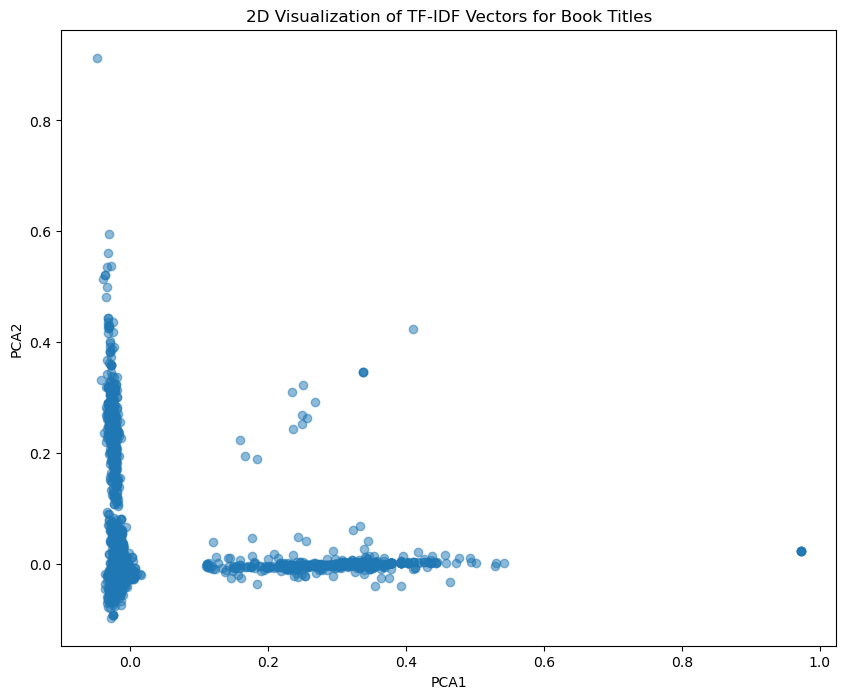

In [13]:
# Visualize the TF-IDF vectors in 2D
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_df['PCA1'], tfidf_df['PCA2'], alpha=0.5)
plt.title('2D Visualization of TF-IDF Vectors for Book Titles')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

In [14]:
# Cosine Similarity Matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_matrix = cosine_similarity(title_matrix, title_matrix)

In [15]:
def get_book_recommendations(book_title, cosine_sim_matrix, book_df):
    """
    Get book recommendations based on cosine similarity of book titles.

    Parameters:
    - book_title: Title of the book for which recommendations are needed.
    - cosine_sim_matrix: Cosine similarity matrix between book titles.
    - book_df: DataFrame containing book information.

    Returns:
    - recommended_books: Series of recommended book titles.
    """
    book_index = book_df[book_df['Book.Title'] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim_matrix[book_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Get the top 3 similar books (excluding itself)

    book_indices = [i[0] for i in sim_scores]
    recommended_books = book_df['Book.Title'].iloc[book_indices]

    return recommended_books

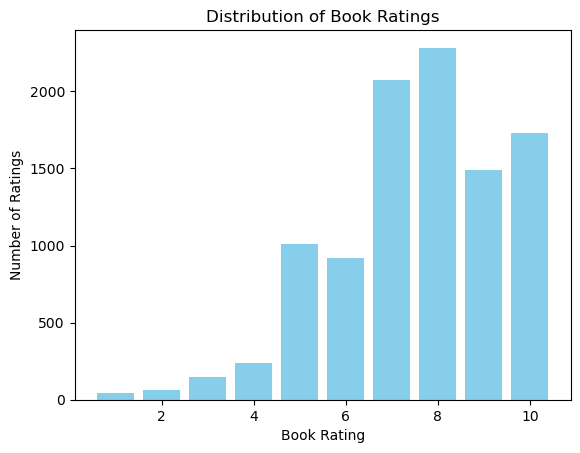

In [16]:
# Distribution of ratings
ratings_distribution = df['Book.Rating'].value_counts().sort_index()
import matplotlib.pyplot as plt
plt.bar(ratings_distribution.index, ratings_distribution.values, color='skyblue')
plt.xlabel('Book Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Book Ratings')
plt.show()

In [17]:
# Example: Get book recommendations for 'Cannibal In Manhattan'
book_title = 'Cannibal In Manhattan'
recommendations = get_book_recommendations(book_title, cosine_sim_matrix, df)

In [18]:
print(f"Recommendations for '{book_title}':")
print(recommendations)

Recommendations for 'Cannibal In Manhattan':
4186               Manhattan Memoir
9896    Manhattan, When I Was Young
665            Kissing in Manhattan
Name: Book.Title, dtype: object


In [ ]:
# The TF-IDF vectorization and PCA are used to capture the essence of book titles in a reduced 2D space, allowing for visualization and potential clustering of similar titles.
# The cosine similarity matrix is employed to find books similar to a given title, providing a basic recommendation system.
# The distribution of ratings gives an overview of how ratings are distributed among the books